In [464]:
# Import required libraries
import requests
import urllib.request
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.axes
import re
import numpy as np
import matplotlib.dates as mdates
%matplotlib inline


In [465]:
# url for scraping data
url = "http://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;template=results;type=batting;view=innings;wrappertype=print"

In [466]:
# Creating class HTMLTableParser
class HTMLTableParser:
    
    def parse_url(self, url):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        return [self.parse_html_table(table)\
               for table in soup.find_all('table')]
    
    def parse_html_table(self, table):
        n_columns = 0
        n_rows = 0
        column_names = []
        
        # Find number of rows and columns and column titles.
        for row in table.find_all('tr'):
            #print('ROW', row)
            td_tags = row.find_all('td')
            #print('TD_TAGS', td_tags)
            if len(td_tags) > 0:
                n_rows += 1
                #print('N_ROWS', n_rows)
                if n_columns == 0:
                    n_columns = len(td_tags)
                    #print('N_COLUMNS', n_columns)
            
            th_tags = row.find_all('th')
            if len(th_tags) > 0 & len(column_names) == 0:
                for th in th_tags:
                    #print('TH_TAGS', th)
                    column_names.append(th.get_text())
                    #print('COLUMN_NAMES', column_names)
        
        if len(column_names) > 0 and len(column_names) != n_columns:
            raise Exception('Column titles do not match the number of columns!')
            
        columns = column_names if len(column_names) > 0 else range(0, n_columns)
        df = pd.DataFrame(columns = columns, index = range(0, n_rows))
        
        row_marker = 0
        for row in table.find_all('tr'):
            #print('ROW:', row)
            column_marker = 0
            columns = row.find_all('td')
            for column in columns:
                #print('COLUMN:', column)
                df.iat[row_marker, column_marker] = column.get_text()
                column_marker += 1
                #print('COLUMN_MARKER:', column_marker)
            if len(columns) > 1:
                row_marker += 1
                #print('ROW_MARKER:', row_marker)
        
        return df

In [467]:
parsed_tables_object = HTMLTableParser()
parsed_tables = parsed_tables_object.parse_url(url)

overall = parsed_tables[2]
innings = parsed_tables[3]

In [468]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
        1 non-null object
Span    1 non-null object
Mat     1 non-null object
Inns    1 non-null object
NO      1 non-null object
Runs    1 non-null object
HS      1 non-null object
Ave     1 non-null object
BF      1 non-null object
SR      1 non-null object
100     1 non-null object
50      1 non-null object
0       1 non-null object
4s      1 non-null object
6s      1 non-null object
dtypes: object(15)
memory usage: 200.0+ bytes


In [469]:
overall[''] = 'Overall'
overall.set_index('', inplace = True, drop = True)
overall

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
,,,,,,,,,,,,,,
Overall,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2016,195


In [470]:
parsed_tables[3].columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns', '',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [471]:
print(type(parsed_tables))

<class 'list'>


In [472]:
innings = parsed_tables[3]

In [473]:
print(type(innings))

<class 'pandas.core.frame.DataFrame'>


In [474]:
innings.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date
0,0,-,2,0,0,0.00,5,caught,2,,v Pakistan,Gujranwala,18 Dec 1989
1,0,2,2,0,0,0.00,5,caught,2,,v New Zealand,Dunedin,1 Mar 1990
2,36,51,39,5,0,92.30,6,caught,1,,v New Zealand,Wellington,6 Mar 1990
3,10,-,12,0,0,83.33,5,run out,1,,v Sri Lanka,Sharjah,25 Apr 1990
4,20,-,25,1,0,80.00,7,caught,2,,v Pakistan,Sharjah,27 Apr 1990


In [475]:
print(type(innings['Start Date'][2]))

<class 'str'>


In [476]:
innings['Start Date'] = pd.to_datetime(innings['Start Date'])
print(innings.head())
print(innings.info())

  Runs Mins  BF 4s 6s     SR Pos Dismissal Inns       Opposition      Ground  \
0    0    -   2  0  0   0.00   5    caught    2       v Pakistan  Gujranwala   
1    0    2   2  0  0   0.00   5    caught    2    v New Zealand     Dunedin   
2   36   51  39  5  0  92.30   6    caught    1    v New Zealand  Wellington   
3   10    -  12  0  0  83.33   5   run out    1      v Sri Lanka     Sharjah   
4   20    -  25  1  0  80.00   7    caught    2       v Pakistan     Sharjah   

  Start Date  
0 1989-12-18  
1 1990-03-01  
2 1990-03-06  
3 1990-04-25  
4 1990-04-27  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
Runs          463 non-null object
Mins          463 non-null object
BF            463 non-null object
4s            463 non-null object
6s            463 non-null object
SR            463 non-null object
Pos           463 non-null object
Dismissal     463 non-null object
Inns          463 non-null object
              463 

In [477]:
innings = innings.set_index(innings['Start Date'])

In [478]:
innings.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,,Opposition,Ground,Start Date
Start Date,,,,,,,,,,,,,
1989-12-18,0,-,2,0,0,0.00,5,caught,2,,v Pakistan,Gujranwala,1989-12-18
1990-03-01,0,2,2,0,0,0.00,5,caught,2,,v New Zealand,Dunedin,1990-03-01
1990-03-06,36,51,39,5,0,92.30,6,caught,1,,v New Zealand,Wellington,1990-03-06
1990-04-25,10,-,12,0,0,83.33,5,run out,1,,v Sri Lanka,Sharjah,1990-04-25
1990-04-27,20,-,25,1,0,80.00,7,caught,2,,v Pakistan,Sharjah,1990-04-27


In [479]:
innings.drop(['Start Date'], axis = 1, inplace = True)

In [480]:
len(innings.columns)

12

In [481]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 463 entries, 1989-12-18 to 2012-03-18
Data columns (total 12 columns):
Runs          463 non-null object
Mins          463 non-null object
BF            463 non-null object
4s            463 non-null object
6s            463 non-null object
SR            463 non-null object
Pos           463 non-null object
Dismissal     463 non-null object
Inns          463 non-null object
              463 non-null object
Opposition    463 non-null object
Ground        463 non-null object
dtypes: object(12)
memory usage: 47.0+ KB


In [482]:
innings.drop([''], axis = 1, inplace = True)

In [483]:
innings.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground'],
      dtype='object')

In [484]:
type(innings['Runs'])

pandas.core.series.Series

In [485]:
print(innings[innings['Runs'] == 'DNB'])

           Runs Mins BF 4s 6s SR Pos Dismissal Inns    Opposition  \
Start Date                                                          
1990-12-25  DNB    -  -  -  -  -   -         -    2  v Bangladesh   
1992-02-28  DNB    -  -  -  -  -   -         -    1   v Sri Lanka   
1993-03-25  DNB    -  -  -  -  -   -         -    2    v Zimbabwe   
2001-10-12  DNB    -  -  -  -  -   -         -    2       v Kenya   
2002-09-29  DNB    -  -  -  -  -   -         -    2   v Sri Lanka   

                   Ground  
Start Date                 
1990-12-25     Chandigarh  
1992-02-28         Mackay  
1993-03-25           Pune  
2001-10-12   Bloemfontein  
2002-09-29  Colombo (RPS)  


**All the columns are non-null object and stored as strings. **

Objective: Convert [Runs, Mins, BF, 4s, 6s, SR, Pos, Inns] to numeric data type.

Problem: columns may have NaN - missing values. To convert to integer, first the NaNs need to be resolved. The issue is that pd.to_numeric() is coercing DNB, TDNB, and 50* (not outs) to NaN!

In [486]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 463 entries, 1989-12-18 to 2012-03-18
Data columns (total 11 columns):
Runs          463 non-null object
Mins          463 non-null object
BF            463 non-null object
4s            463 non-null object
6s            463 non-null object
SR            463 non-null object
Pos           463 non-null object
Dismissal     463 non-null object
Inns          463 non-null object
Opposition    463 non-null object
Ground        463 non-null object
dtypes: object(11)
memory usage: 43.4+ KB


In [487]:
innings['Runs'][2]

'36'

**Objective: Removing non-numeric characters from Runs column**

In [488]:
# Dropping rows with DNB/TDNB in Runs column
pattern = r'[a-zA-Z]'
innings = innings[innings.Runs.str.contains(pattern) == False]

In [489]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 1989-12-18 to 2012-03-18
Data columns (total 11 columns):
Runs          452 non-null object
Mins          452 non-null object
BF            452 non-null object
4s            452 non-null object
6s            452 non-null object
SR            452 non-null object
Pos           452 non-null object
Dismissal     452 non-null object
Inns          452 non-null object
Opposition    452 non-null object
Ground        452 non-null object
dtypes: object(11)
memory usage: 42.4+ KB


In [490]:
# Removing non-numeric characters from Runs column
innings['Runs'] = innings.Runs.str.replace('\W', '')
    

In [491]:
# Converting columns of innings dataframe to correct data type from strings initially
innings['Runs'] = pd.to_numeric(innings['Runs'])
#innings['Mins'] = pd.to_numeric(innings['Mins'])
innings['BF'] = pd.to_numeric(innings['BF'])
innings['4s'] = pd.to_numeric(innings['4s'])
innings['6s'] = pd.to_numeric(innings['6s'])
innings['SR'] = pd.to_numeric(innings['SR'])
#innings['Pos'] = pd.to_numeric(innings['Pos'])
#innings['Inns'] = pd.to_numeric(innings['Inns'])

In [492]:
innings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 452 entries, 1989-12-18 to 2012-03-18
Data columns (total 11 columns):
Runs          452 non-null int64
Mins          452 non-null object
BF            452 non-null int64
4s            452 non-null int64
6s            452 non-null int64
SR            452 non-null float64
Pos           452 non-null object
Dismissal     452 non-null object
Inns          452 non-null object
Opposition    452 non-null object
Ground        452 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 42.4+ KB


In [493]:
innings.drop('Mins', axis = 1, inplace = True)

In [494]:
final_innings_df = innings.copy()

In [495]:
final_innings_df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground
Start Date,,,,,,,,,,
1989-12-18,0,2,0,0,0.00,5,caught,2,v Pakistan,Gujranwala
1990-03-01,0,2,0,0,0.00,5,caught,2,v New Zealand,Dunedin
1990-03-06,36,39,5,0,92.30,6,caught,1,v New Zealand,Wellington
1990-04-25,10,12,0,0,83.33,5,run out,1,v Sri Lanka,Sharjah
1990-04-27,20,25,1,0,80.00,7,caught,2,v Pakistan,Sharjah


**final_innings_df and innings are the final processed dataframes which will be used for Exploratory Data Analysis and Visualisation. **

We start with frequency counts of categorical variables (Pos, Dismissal, Inns, Opposition, Ground).

In [496]:
pos = innings.Pos.value_counts(dropna = False)
dismissal = innings.Dismissal.value_counts(dropna = False)
inns = innings.Inns.value_counts(dropna = False)
opposition = innings.Opposition.value_counts(dropna = False)
ground = innings.Ground.value_counts(dropna = False)

In [497]:
pos

2    293
4     61
1     47
5     36
3     10
6      4
7      1
Name: Pos, dtype: int64

In [498]:
dismissal

caught            258
bowled             68
not out            40
lbw                39
run out            34
stumped            11
retired notout      1
hit wicket          1
Name: Dismissal, dtype: int64

In [499]:
inns

2    232
1    220
Name: Inns, dtype: int64

In [500]:
opposition.head()

v Sri Lanka       80
v Australia       70
v Pakistan        67
v South Africa    57
v New Zealand     41
Name: Opposition, dtype: int64

In [501]:
ground.head()

Sharjah          42
Colombo (RPS)    26
Dhaka            15
Kolkata          12
Toronto          11
Name: Ground, dtype: int64

In [506]:
# Below is the percentage or the normalised value for each category.
pos_per = (innings.Pos.value_counts(dropna = False, normalize = True).round(3))*100
dismissal_per = (innings.Dismissal.value_counts(dropna = False, normalize = True).round(3))*100
inns_per = (innings.Inns.value_counts(dropna = False, normalize = True).round(3))*100
opposition_per = (innings.Opposition.value_counts(dropna = False, normalize = True).round(3))*100
ground_per = (innings.Ground.value_counts(dropna = False, normalize = True).round(3))*100

In [507]:
pos_per

2    64.8
4    13.5
1    10.4
5     8.0
3     2.2
6     0.9
7     0.2
Name: Pos, dtype: float64

In [508]:
dismissal_per

caught            57.1
bowled            15.0
not out            8.8
lbw                8.6
run out            7.5
stumped            2.4
retired notout     0.2
hit wicket         0.2
Name: Dismissal, dtype: float64

In [509]:
inns_per

2    51.3
1    48.7
Name: Inns, dtype: float64

In [510]:
ground_per

Sharjah               9.3
Colombo (RPS)         5.8
Dhaka                 3.3
Kolkata               2.7
Toronto               2.4
Mumbai                2.4
Bengaluru             2.4
Colombo (SSC)         2.2
Cuttack               2.2
Brisbane              2.0
Nagpur                2.0
Gwalior               2.0
Adelaide              1.8
Centurion             1.8
Durban                1.8
Perth                 1.8
Delhi                 1.8
Kanpur                1.8
Sydney                1.8
Vadodara              1.5
Rajkot                1.5
Melbourne             1.5
Hyderabad (Deccan)    1.5
Jaipur                1.5
Mohali                1.5
Wellington            1.3
Port of Spain         1.3
Chennai               1.3
Harare                1.3
Johannesburg          1.1
                     ... 
Bristol               0.7
Bridgetown            0.4
Peshawar              0.4
Nottingham            0.4
Christchurch          0.4
Indore                0.4
Karachi               0.4
Bloemfontein

In [511]:
opposition_per

v Sri Lanka       17.7
v Australia       15.5
v Pakistan        14.8
v South Africa    12.6
v New Zealand      9.1
v West Indies      8.6
v England          8.2
v Zimbabwe         7.3
v Bangladesh       2.4
v Kenya            2.0
v Ireland          0.4
v U.A.E.           0.4
v Netherlands      0.4
v Namibia          0.2
v Bermuda          0.2
Name: Opposition, dtype: float64

In [512]:
innings.columns

Index(['Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground'],
      dtype='object')

In [513]:
innings.describe()

,Runs,BF,4s,6s,SR
count,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.765487,47.272124,4.460177,0.431416,74.584093
std,40.039480,40.015394,4.544016,0.995415,35.903621
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,15.000000,1.000000,0.000000,54.540000
50%,28.500000,33.000000,3.000000,0.000000,75.860000
75%,63.000000,70.000000,7.000000,0.000000,97.587500
max,200.000000,153.000000,25.000000,7.000000,196.550000


** Visual Exploratory Data Analysis**

Histogram - continuous numerical data

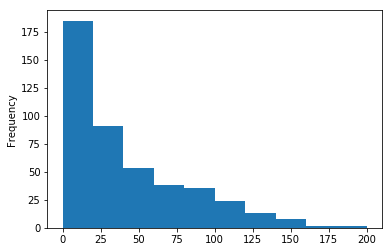

In [514]:
innings.Runs.plot('hist')

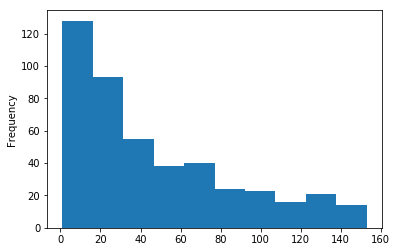

In [515]:
innings.BF.plot('hist')

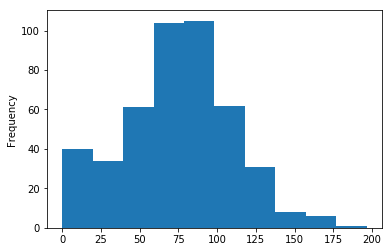

In [517]:
innings['SR'].plot('hist')

** Creating barplots for categorical data using its frequency counts**

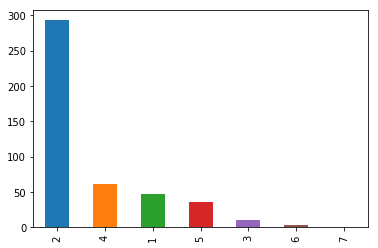

In [518]:
pos.plot('bar')

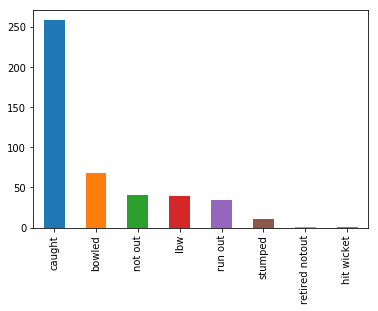

In [519]:
dismissal.plot('bar')

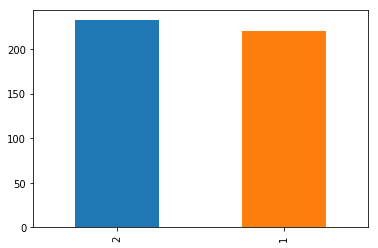

In [520]:
inns.plot('bar')

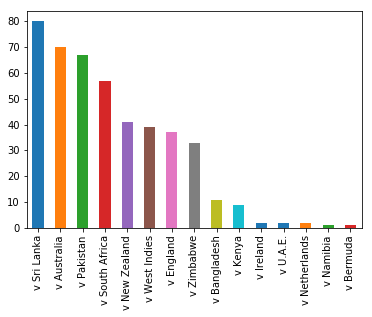

In [521]:
opposition.plot('bar')

In [523]:
innings.groupby('Pos').Inns.count()

Pos
1     47
2    293
3     10
4     61
5     36
6      4
7      1
Name: Inns, dtype: int64

In [524]:
print(innings['Dismissal'].to_string())

Start Date
1989-12-18            caught
1990-03-01            caught
1990-03-06            caught
1990-04-25           run out
1990-04-27            caught
1990-07-18            bowled
1990-07-20            bowled
1990-12-01            bowled
1990-12-05            bowled
1990-12-08            caught
1990-12-28               lbw
1991-01-04               lbw
1991-10-18           not out
1991-10-19           run out
1991-10-22           not out
1991-10-23            caught
1991-10-25               lbw
1991-11-10            caught
1991-11-12            caught
1991-11-14            caught
1991-12-06            caught
1991-12-08            caught
1991-12-10            caught
1991-12-14            caught
1991-12-15            caught
1992-01-11            caught
1992-01-14           run out
1992-01-16           not out
1992-01-18            caught
1992-01-20            caught
1992-02-22            caught
1992-03-01            caught
1992-03-04           not out
1992-03-07            caught
199

In [563]:
# Function to calculate Runs, BF and SR for every year
def yearly(year):
    return innings.loc[str(year), ['Runs', 'BF']].sum()

In [564]:
yearly(1989)

Runs    0
BF      2
dtype: int64

In [565]:
yearly(1990)

Runs    239
BF      242
dtype: int64

In [566]:
yearwise = {}
for i in range(1989, 2013):
    yearwise[str(i)] = yearly(i)
    #print(yearwise)

In [567]:
yearly_df = pd.DataFrame(yearwise).transpose()

In [568]:
yearly_df.index = pd.to_datetime(yearly_df.index)

In [569]:
yearly_df.index

DatetimeIndex(['1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01'],
              dtype='datetime64[ns]', freq=None)

In [570]:
yearly_df.head()

,Runs,BF
1989-01-01,0,2
1990-01-01,239,242
1991-01-01,417,560
1992-01-01,704,1019
1993-01-01,319,436


In [599]:
yearly_df['Matches'] = innings['Runs'].resample('A').count().values

In [600]:
yearly_df.head()

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR
Year,,,,,,,,
1989-01-01,0,2,1,0,1,0.00,0.0,0.00
1990-01-01,239,242,10,0,10,23.90,98.8,122.70
1991-01-01,417,560,14,2,12,34.75,74.5,109.25
1992-01-01,704,1019,20,2,18,39.11,69.1,108.21
1993-01-01,319,436,17,4,13,24.54,73.2,97.74


In [601]:
innings[innings['Dismissal'] == 'not out'].resample('A').count().Dismissal

Start Date
1991-12-31    2
1992-12-31    2
1993-12-31    4
1994-12-31    2
1995-12-31    1
1996-12-31    2
1997-12-31    3
1998-12-31    4
1999-12-31    2
2000-12-31    0
2001-12-31    3
2002-12-31    5
2003-12-31    1
2004-12-31    1
2005-12-31    1
2006-12-31    2
2007-12-31    2
2008-12-31    1
2009-12-31    1
2010-12-31    1
Freq: A-DEC, Name: Dismissal, dtype: int64

In [602]:
# Determining the number of Not Outs to calculate average
notout = (innings[innings['Dismissal'] == 'not out'].resample('A').count().Dismissal).values

In [603]:
len(notout)

20

In [604]:
notout = np.insert(notout, [0,0], [0,0])

In [605]:
notout

array([0, 0, 2, 2, 4, 2, 1, 2, 3, 4, 2, 0, 3, 5, 1, 1, 1, 2, 2, 1, 1, 1],
      dtype=int64)

In [606]:
notout

array([0, 0, 2, 2, 4, 2, 1, 2, 3, 4, 2, 0, 3, 5, 1, 1, 1, 2, 2, 1, 1, 1],
      dtype=int64)

In [607]:
notout = np.append(notout, [0, 0])

In [608]:
len(notout)

24

In [609]:
notout

array([0, 0, 2, 2, 4, 2, 1, 2, 3, 4, 2, 0, 3, 5, 1, 1, 1, 2, 2, 1, 1, 1,
       0, 0], dtype=int64)

In [610]:
yearly_df['NotOut'] = notout

In [611]:
yearly_df.head()

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR
Year,,,,,,,,
1989-01-01,0,2,1,0,1,0.00,0.0,0.00
1990-01-01,239,242,10,0,10,23.90,98.8,122.70
1991-01-01,417,560,14,2,12,34.75,74.5,109.25
1992-01-01,704,1019,20,2,18,39.11,69.1,108.21
1993-01-01,319,436,17,4,13,24.54,73.2,97.74


In [612]:
yearly_df['Out'] = yearly_df['Matches'] - yearly_df['NotOut']

In [613]:
yearly_df.head()

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR
Year,,,,,,,,
1989-01-01,0,2,1,0,1,0.00,0.0,0.00
1990-01-01,239,242,10,0,10,23.90,98.8,122.70
1991-01-01,417,560,14,2,12,34.75,74.5,109.25
1992-01-01,704,1019,20,2,18,39.11,69.1,108.21
1993-01-01,319,436,17,4,13,24.54,73.2,97.74


In [614]:
yearly_df['Average'] = round(yearly_df['Runs']/yearly_df['Out'], 2)

In [615]:
yearly_df.head()

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR
Year,,,,,,,,
1989-01-01,0,2,1,0,1,0.00,0.0,0.00
1990-01-01,239,242,10,0,10,23.90,98.8,122.70
1991-01-01,417,560,14,2,12,34.75,74.5,109.25
1992-01-01,704,1019,20,2,18,39.11,69.1,108.21
1993-01-01,319,436,17,4,13,24.54,73.2,97.74


Text(0.5,1,'Sachin Tendulkar - Average (Yearwise)')

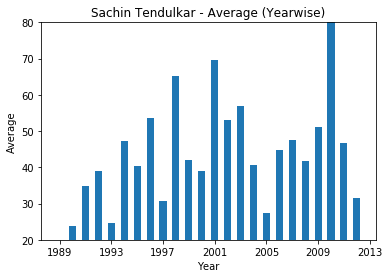

In [617]:
plt.bar(yearly_df.index, yearly_df.Average, width = 200)
plt.ylim(20,80)
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Sachin Tendulkar - Average (Yearwise)')

In [618]:
yearly_df['SR'] = (yearly_df['Runs']/yearly_df['BF'])*100

In [619]:
yearly_df['SR'] = yearly_df.SR.round(1)

In [620]:
yearly_df.head()

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR
Year,,,,,,,,
1989-01-01,0,2,1,0,1,0.00,0.0,0.00
1990-01-01,239,242,10,0,10,23.90,98.8,122.70
1991-01-01,417,560,14,2,12,34.75,74.5,109.25
1992-01-01,704,1019,20,2,18,39.11,69.1,108.21
1993-01-01,319,436,17,4,13,24.54,73.2,97.74


In [621]:
# naming the index
yearly_df.index.name = 'Year'

Text(0.5,1,'Sachin Tendulkar - Runs Scored (Yearwise)')

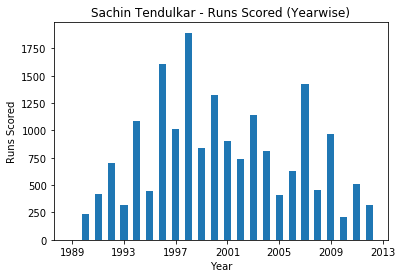

In [622]:
plt.bar(yearly_df.index, yearly_df.Runs, width = 200)
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.title('Sachin Tendulkar - Runs Scored (Yearwise)')

In [623]:
yearly_df['Avg_SR'] = yearly_df['Average'] + yearly_df['SR']

In [624]:
yearly_df.Avg_SR

Year
1989-01-01      0.00
1990-01-01    122.70
1991-01-01    109.25
1992-01-01    108.21
1993-01-01     97.74
1994-01-01    135.95
1995-01-01    141.76
1996-01-01    136.10
1997-01-01    115.64
1998-01-01    167.51
1999-01-01    130.75
2000-01-01    120.86
2001-01-01    160.84
2002-01-01    140.43
2003-01-01    144.45
2004-01-01    120.70
2005-01-01    104.77
2006-01-01    121.96
2007-01-01    133.10
2008-01-01    126.02
2009-01-01    145.16
2010-01-01    338.20
2011-01-01    135.24
2012-01-01    112.90
Name: Avg_SR, dtype: float64

Text(0.5,1,'Sachin Tendulkar - ASR (Average + SR Yearwise)')

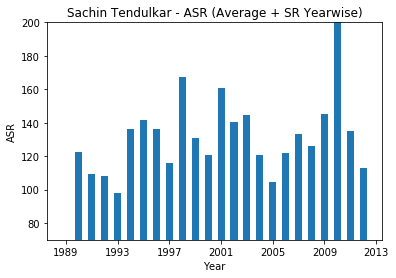

In [626]:
plt.bar(yearly_df.index, yearly_df.Avg_SR, width = 200)
plt.ylim(70, 200)
plt.xlabel('Year')
plt.ylabel('ASR')
plt.title('Sachin Tendulkar - ASR (Average + SR Yearwise)')

In [627]:
(yearly_df[yearly_df.Avg_SR > 120].Avg_SR.count()/len(yearly_df.index)).round(2)

0.71

In [628]:
overall

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
,,,,,,,,,,,,,,
Overall,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2016,195


In [630]:
century = innings[innings['Runs'] > 99].Runs.resample('A').count()

In [631]:
century = century.values
century = np.insert(century, [0,0,0,0,0], [0,0,0,0,0])

In [632]:
len(century)

24

In [633]:
 century

array([0, 0, 0, 0, 0, 3, 1, 6, 2, 9, 3, 3, 4, 2, 3, 1, 1, 2, 1, 1, 3, 1,
       2, 1], dtype=int64)

In [634]:
yearly_df['100s'] = century

In [636]:
# Defining function for phase analysis
def phaseAnalysis(year_1, year_2):
    average = round((yearly_df[str(year_1):str(year_2)].Runs.sum()/(yearly_df[str(year_1):str(year_2)].Out.sum() - 1)), 2)
    sr = round(((yearly_df[str(year_1):str(year_2)].Runs.sum()/yearly_df[str(year_1):str(year_2)].BF.sum())*100),2)
    avg_sr = round((average + sr), 2)
    runs = int(yearly_df[str(year_1):str(year_2)].Runs.sum())
    matches = yearly_df[str(year_1):str(year_2)].Matches.sum()
    slice = yearly_df[str(year_1):str(year_2)]
    thousand = slice[slice.Runs > 500].Runs.count()
    try:
        match_per_century = round((slice['Matches'].sum()/slice['100s'].sum()), 1)
    except ZeroDivisionError:
        match_per_century = float('Inf')
    return (average, sr, avg_sr, runs, matches, thousand, match_per_century)

phaseAnalysis(1989, 1993)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


(31.68, 74.32, 106.0, 1679, 62, 1, inf)

In [651]:
phase_i = phaseAnalysis(1989, 1993)
phase_ii = phaseAnalysis(1994, 1997)
phase_iii = phaseAnalysis(1998, 2004)
phase_iv = phaseAnalysis(2005, 2006)
phase_v = phaseAnalysis(2007, 2012)

# using a dictionary to practice storing dta and converting it later into a dataframe
phase_dict = {}
phase_dict['phase_i'] = phase_i
phase_dict['phase_ii'] = phase_ii
phase_dict['phase_iii'] = phase_iii
phase_dict['phase_iv'] = phase_iv
phase_dict['phase_v'] = phase_v

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in longlong_scalars
  # This is added back by InteractiveShellApp.init_path()


In [652]:
phase_dict

{'phase_i': (31.68, 74.32, 106.0, 1679, 62, 1, inf),
 'phase_ii': (43.28, 86.36, 129.64, 4155, 105, 3, 8.8),
 'phase_iii': (51.43, 89.25, 140.68, 7663, 166, 7, 6.6),
 'phase_iv': (37.14, 77.15, 114.29, 1040, 32, 1, 10.7),
 'phase_v': (48.01, 89.14, 137.15, 3889, 87, 3, 9.7)}

In [653]:
phase_df = pd.DataFrame(phase_dict)

In [654]:
phase_df.iloc[3:6, :] = phase_df.iloc[3:6,:].astype(int)

In [655]:
phase_df = phase_df.transpose()
phase_col = ['Average', 'SR', 'ASR', 'Runs', 'Matches', 'Runs_1000', 'Match_per_Century']
phase_df = phase_df.rename(columns = {0: phase_col[0], 1: phase_col[1], 2: phase_col[2], 3: phase_col[3], 4: phase_col[4], 5: phase_col[5], 6: phase_col[6]})
phase_df['Phase'] = ['Phase_I', 'Phase_II', 'Phase_III', 'Phase_IV', 'Phase_V']
phase_df.set_index('Phase', drop = True, inplace =  True)
phase_df[['Runs', 'Matches', 'Runs_1000']] = phase_df[['Runs', 'Matches', 'Runs_1000']].astype('int')
phase_df['Match_per_Century'][0] = 'NaN'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [656]:
type(phase_df['Runs'][2])

numpy.int32

In [657]:
X = phase_dict.keys()
phase_avg = []
phase_sr = []
phase_avg_sr = []
for k in phase_dict:
    phase_avg.append(phase_dict[k][0])
    phase_sr.append(phase_dict[k][1])
    phase_avg_sr.append(phase_dict[k][2])

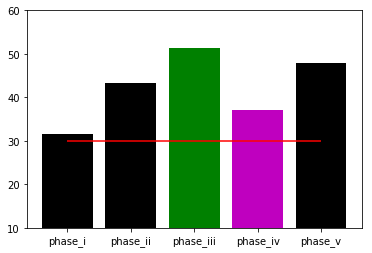

In [658]:
ax = plt.subplot(1,1,1)
ax.bar(x = list(X) , height = phase_avg, color = ['k', 'k', 'g', 'm', 'k'])
plt.ylim(10, 60)
matplotlib.axes.Axes.hlines(ax, y = 30, xmin = 0, xmax = 4, color = 'r')



**Sachin Ramesh Tendulkar**
A man. A god. A legend.
Tendulkar is a presence that has shaped not just our cricket but us, India, as a country. We have been privileged to witness 24 years of sheer genuius that transformed a sport into into an art form. Wielding a whopping 1.5 kg willow as a wizard's wand, he beat the bowlers blue and bruised left, right and centre. For context, Chris Gayle uses a bat weighing 1.3 kg!

Enough has been written and said about the little Master. Every aspect of his life and carrer has been scrutinised, discussed and debated to death.

Here, I deep-dived into his innings by innings data for ODIs (scraped from Cricinfo, where else!), sliced, diced and aggregated them year-wise. It was fascinating to see some interesting trends emerge from this play of numbers as if the numbers themselves were anxious to validate what we have all believed.
Based on this analysis, there emerged 5 distinct phases of Sachin's career. We will be discussing each of them one by one and also the some of most influential ODI innings of each phase. 

In [659]:
# Overall Statistics
overall

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
,,,,,,,,,,,,,,
Overall,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,2016,195


**Phase I: Scene I - The Prologue/The Initiation - (1989-1993)**

A short-statured, curly-haired figure walked out to the centre on 18 December 1989 to face the Imram-Wasim-Wakar-Qadir quartet. And he walked back to the pavillion on the second ball for a glorious duck. It was an anti-climax of sorts and few people remember his debut. But, it was the exhibition match before this debut and what transpired there has become a part of cricketing folklore. After being taunted by Abdul Qadir, Sachin smashed the leg-spinning maestro for 28 runs and everyone took notice.

Sachin's initiation was one of trial by fire. He consistently batted at positions in the middle and lower-middle order. This can be seen in the barplot that follows: (Plot 1 - Frequency by Position)

He struggled to get going throughout this phase as is evident from his overall average in the low 30s and strike rate in low 70s. His ASR score (a metric defined as sum of Average and Strike Rate as an indicator of impact, speed of scoring and consistency) was 106, definitely low for a player of his caliber. (Stats 1)

In this phase, Sachin sparkled occassionally such as as his 52 notout in 40 balls against Pakistan in Sharjah (Stats 2). A beginning towards a long and era defining career had been made. The talent and potential were there but just not being utilised to its maximum.

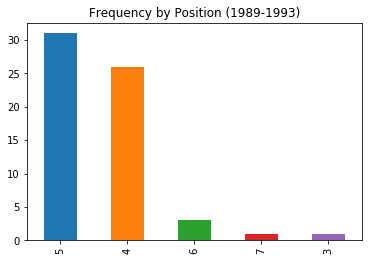

In [660]:
# Plot 1: Phase I (1989-1993) Frequency by Position
innings.loc['1989' : '1993', 'Pos'].value_counts().plot(kind = 'bar', title = 'Frequency by Position (1989-1993)')

In [661]:
# Stats 1: Phase I
# ASR = Average + Strike Rate(SR)
# Runs_1000 = Number of years with more than 1000 runs scored

phase_df[ : 'Phase_I']

,Average,SR,ASR,Runs,Matches,Runs_1000,Match_per_Century
Phase,,,,,,,
Phase_I,31.68,74.32,106.0,1679,62,1,NaN


In [662]:
# Stats 2 - Innings vs Pakistan
innings.loc['1991-10-18', :]

Runs                  52
BF                    40
4s                     5
6s                     0
SR                   130
Pos                    5
Dismissal        not out
Inns                   1
Opposition    v Pakistan
Ground           Sharjah
Name: 1991-10-18 00:00:00, dtype: object

**Phase II - Scene II - Rise of the Protagonist (1994-1997)**

This was an exciting and interesting phase of Sachin's career when he was promoted as the opener in New Zealand in March 1994. It was at this position (batting at 1 and 2 as shown in Plot 2) that he truly came into his own and began the journey towards the freely scoring, aesthetically pleasing player we all know him to be.
He thrashed the New Zealand bowlers in his first and third innings as an opener scoring a total of 122 runs at a strike rate of 160, quite unheard of at the time! (Stats 3)
It was during 1994 that he scored the first ODI of his 49 centuries in his 79th match against Australia in Colombo. And, this century was followed by 3 consecutive ducks in his next three innings. An amusing quirk of fate! (Stats 4)

Sachin's average improved significantly to mid-40s and strike rate to mid-80s. This was the phase which also gave us his blistering 523 runs at the 1996 World Cup (Stats 5). Sachin batted like a man possessed, a man on a mission, single-handedly carrying the team only for the team to collapse spectacularly once he got out on 65 chasing 251 in the semi-final against Sri Lanka at Eden Gardens (Kolkata). (Stats 6)

It was a collective heart-break for a nation and a sign of things to come. It became a predictable pattern with him standing head and shoulders above others in a mediocre team. It was said that when Sachin came to bat, the country switched on television and switched off its life. But once he got out, the same country went back to business as usual as all hope seemed lost. He not just symbolised hope but he was hope. He defined the way our identity was formed as a nation in the 1990s. It was the decade where our economy had been opened to the external forces and we, as a nation, were trying to find our place in the world. We wanted to compete with rest of the world, we wanted to show the world our excellence at something, anything and Sachin was there.

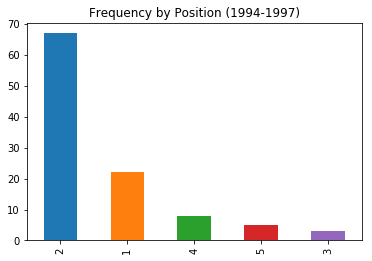

In [663]:
# Plot 2: Phase II (1994-1997) Frequency by Position
innings.loc['1994': '1997', 'Pos'].value_counts().plot(kind = 'bar', title = 'Frequency by Position (1994-1997)')

In [664]:
# Stats 3: First, second and third innings vs New Zealand
open_1994 = innings.loc['1994-03-27': '1994-04-02', :]
open_1994_avg = round(open_1994.Runs.sum()/3, 2)
open_1994_strikerate = round((open_1994.Runs.sum()/open_1994.BF.sum())*100, 2)
print(open_1994, '\n')
print('open_1994_avg: ', open_1994_avg)
print('open_1994_strikerate: ', open_1994_strikerate)

            Runs  BF  4s  6s      SR Pos Dismissal Inns     Opposition  \
Start Date                                                               
1994-03-27    82  49  15   2  167.34   2    caught    2  v New Zealand   
1994-03-30    63  75   9   0   84.00   2       lbw    1  v New Zealand   
1994-04-02    40  26   8   0  153.84   2    bowled    1  v New Zealand   

                  Ground  
Start Date                
1994-03-27      Auckland  
1994-03-30    Wellington  
1994-04-02  Christchurch   

open_1994_avg:  61.67
open_1994_strikerate:  123.33


In [665]:
# Stats 4: First century and the three ducks
innings['1994-09-09':'1994-10-20']

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground
Start Date,,,,,,,,,,
1994-09-09,110,130,8,2,84.61,2,bowled,1,v Australia,Colombo (RPS)
1994-09-17,0,2,0,0,0.00,2,caught,2,v Sri Lanka,Colombo (SSC)
1994-10-17,0,4,0,0,0.00,2,caught,2,v West Indies,Faridabad
1994-10-20,0,4,0,0,0.00,2,caught,2,v West Indies,Mumbai


In [666]:
# Stats 5: 1996 World Cup
wc_1996 = innings.loc['1996-02-18': '1996-03-13', :]
notout_1996  = wc_1996[wc_1996.Dismissal == 'not out'].Dismissal.count()
wc_1996_runs = wc_1996.Runs.sum()
wc_1996_avg = round(wc_1996.Runs.sum()/(len(wc_1996) - notout_1996), 2)
print(wc_1996,'\n')
print('wc_1996_runs: ', wc_1996_runs)
print('wc_1996_avg: ', wc_1996_avg)

            Runs   BF  4s  6s      SR Pos Dismissal Inns     Opposition  \
Start Date                                                                
1996-02-18   127  138  15   1   92.02   2   not out    2        v Kenya   
1996-02-21    70   91   8   0   76.92   2   run out    2  v West Indies   
1996-02-27    90   84  14   1  107.14   2   stumped    2    v Australia   
1996-03-02   137  137   8   5  100.00   2   run out    1    v Sri Lanka   
1996-03-06     3   12   0   0   25.00   1    bowled    1     v Zimbabwe   
1996-03-09    31   59   3   0   52.54   2    bowled    1     v Pakistan   
1996-03-13    65   88   9   0   73.86   1   stumped    2    v Sri Lanka   

               Ground  
Start Date             
1996-02-18    Cuttack  
1996-02-21    Gwalior  
1996-02-27     Mumbai  
1996-03-02      Delhi  
1996-03-06     Kanpur  
1996-03-09  Bengaluru  
1996-03-13    Kolkata   

wc_1996_runs:  523
wc_1996_avg:  87.17


In [667]:
# Stats 6: Semi-final - World Cup 1996
innings.loc['1996-03-13',  :]

Runs                   65
BF                     88
4s                      9
6s                      0
SR                  73.86
Pos                     1
Dismissal         stumped
Inns                    2
Opposition    v Sri Lanka
Ground            Kolkata
Name: 1996-03-13 00:00:00, dtype: object

**Phase III - Scene III - God-mode! (1998-2003)**

1998! The year with the most runs scored in a calendar year in ODIs. The year of the sandstorm, both literal and metaphorical. At times it felt as if he was pplaying the EA Sports Cricket of 2007 in easy mode. Pakistan, AUstralia, SriLanka, New Zealand - he thrashed them all. Scoring at an average of 65 and strike rate of 100+ (ASR score of 167), he blasted away 9 centuries this year - still a record for most number of centuries in a calendar year (Stats 7). 

Centuries kept coming thick and fast - a total of 24 in this phase with Sachin scoring a century once every 6.6 matches, an astounding output by any standards. (Stats 8)

Sachin scoring heavily and India losing crunch matches - both became as predictable as day following night. We just did not have the bowling attack to back him up. It was like Messi with Argentina today. 

After a brief lull and dip in form (by his standards)in 2000 (ASR of 120) (Stats 9), he was back to his roaring best in 2001 (ASR of 160) (Stats 9). This was the phase where we were privileged to witness *that innings and that shot* against Pakistan in 2003 (Stats 10). Overall, this phase was the golden of his career where he scored at an average of 52+ and strike rate of 90 (ASR of 140) - a rate of scoring and consistency unmatched till the post-T20 contemporary era (Stats 8).

Outside of him being at his best, things were also changing for Team India with another young charimatic captain at the helm and a new generation of talented and temperamentally sound cricketers coming through. This generation was the one who had grown up idolising him and watching Sachin take apart the best of bowling line-ups at will.

In [668]:
# Stats 7: The legend of the year 1998
yearly_df['1998']

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR,100s
Year,,,,,,,,,
1998-01-01,1894,1854,33,4,29,65.31,102.2,167.51,9


In [669]:
# Stats 8: Phase III (1998-2003) God-mode with 1 century every 6.6 matches! 
phase_df.loc['Phase_III',:]

Average                51.43
SR                     89.25
ASR                   140.68
Runs                 7663.00
Matches               166.00
Runs_1000               7.00
Match_per_Century       6.60
Name: Phase_III, dtype: float64

In [670]:
# Stats 9: The year 2000 and 2001
yearly_df['2000':'2001']

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR,100s
Year,,,,,,,,,
2000-01-01,1328,1624,34,0,34,39.06,81.8,120.86,3
2001-01-01,904,990,16,3,13,69.54,91.3,160.84,4


In [671]:
# Stats 10: THAT innings vs Pakistan at World Cup 2003 where Sachin hit Akhtar for THAT six
innings.loc['2003-03-01', :]

Runs                  98
BF                    75
4s                    12
6s                     1
SR                130.66
Pos                    1
Dismissal         caught
Inns                   2
Opposition    v Pakistan
Ground         Centurion
Name: 2003-03-01 00:00:00, dtype: object

**Phase IV - Scene IV - Catastrophe (2004-2006)** 

Towards the end of 2004 and beginning of 2005, something appeared to be amiss. He was suffering from a significant dip in form with scores of 16, 19, 47, 4, 2, 6, 123, 1, 9 (Stats 11). It was the year when the Indian households were introduced to the term 'Tennis-elbow'. Everyone became a medical expert overnight and had their own remedies to cure the maestro. It was almost like a Greek tragedy - the protagonist at his most prosperous suffers a complete reversal of fortune - peripeteia. He was out with this injury for a significant amount of time and he himself has said that he feare his playing days were over.
This illustrates this dark phase of his career where his average fell to low 30s and strike rate below 80, number unseen since his initial days. In fact, in 2005, he averaged barely 30 and his ASR was just 104 (Stats 12). Sachin was 32 years old at the time and few gave him the chance to recover make a successful comeback. But he did heal and made a strong comeback.

In [672]:
# Stats 11: Tennis-elbow!
struggle = innings.loc['2004-11-13': '2005-04-17', :]
struggle_runs = struggle.Runs.sum()
struggle_notout = struggle[struggle.Dismissal == 'not out']
struggle_avg = round(struggle_runs/len(struggle)-len(struggle_notout), 2)
print(struggle, '\n')
print('Struggling for runs: ', struggle_runs)
print('Average: ', struggle_avg)

            Runs   BF  4s  6s      SR Pos Dismissal Inns    Opposition  \
Start Date                                                               
2004-11-13    16   17   2   0   94.11   2   run out    1    v Pakistan   
2004-12-23    19   32   3   0   59.37   2    caught    1  v Bangladesh   
2004-12-27    47   42   9   0  111.90   2    caught    1  v Bangladesh   
2005-04-02     4    4   1   0  100.00   2    caught    1    v Pakistan   
2005-04-05     2    8   0   0   25.00   2   run out    1    v Pakistan   
2005-04-09     6   11   1   0   54.54   2    caught    2    v Pakistan   
2005-04-12   123  130  12   2   94.61   2    bowled    1    v Pakistan   
2005-04-15     1   10   0   0   10.00   2    caught    1    v Pakistan   
2005-04-17     9   15   0   0   60.00   2    bowled    2    v Pakistan   

                   Ground  
Start Date                 
2004-11-13        Kolkata  
2004-12-23     Chittagong  
2004-12-27          Dhaka  
2005-04-02          Kochi  
2005-04-05  Visak

In [673]:
# Stats 12: 2005
yearly_df['2005']

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR,100s
Year,,,,,,,,,
2005-01-01,412,533,16,1,15,27.47,77.3,104.77,1


**Phase V - Scene V - Catharsis(2007-2012)**

2007! The year of Caribbean World Cup disaster for the ODI team.
But for Sachin, it was a year of personal success as he bounced back from the dip in form and started scoring freely again. Compared to his 1998 self, his strike rate had dropped slighlty but he was more consistent. It was also a tragic-comic year for him in a sense that nervous 90s bit him 6 times in 2007 with three scores of 99 (Stats 13)! Sachin's ASR soared again to 133 in 2007 and 145 in 2009 where he averaged 50+ with strike rate of 90+ as he made 972 runs and 3 centuries (Stats 14). This exceptional form on his second coming culminated in pinnacle of his individual achievements when he became the first batsman to breach the seemingly impossible double-century(200) barrier in One Day cricket.
Along the way, 2008 gave us two of his most cherished performances where he ensured India won the CB Series on Australian soil.

And who can forget the 2011 World Cup triumph where he scored 482 runs with 2 centuries and the critical 85 in semi-final which helped us defeat Pakistan. And as the cliche goes, rest is history!

In [674]:
# Stats 13: The Nervous Nineties!
innings_2007 = innings['2007']
nervous_90s = innings_2007[(innings.Runs > 89) & (innings.Runs < 100)]
nervous_90s

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground
Start Date,,,,,,,,,,
2007-06-26,99,143,12,0,69.23,2,run out,1,v South Africa,Belfast
2007-06-29,93,106,13,2,87.73,2,bowled,2,v South Africa,Belfast
2007-08-24,99,112,15,1,88.39,2,caught,1,v England,Bristol
2007-09-05,94,81,16,1,116.04,2,caught,2,v England,The Oval
2007-11-08,99,91,14,1,108.79,2,caught,1,v Pakistan,Mohali
2007-11-15,97,102,16,0,95.09,2,bowled,2,v Pakistan,Gwalior


In [675]:
# Stats 14: The Second Coming
yearly_df['2007':'2010']

,Runs,BF,Matches,NotOut,Out,Average,SR,Avg_SR,100s
Year,,,,,,,,,
2007-01-01,1425,1665,32,2,30,47.50,85.6,133.10,1
2008-01-01,460,546,12,1,11,41.82,84.2,126.02,1
2009-01-01,972,1034,20,1,19,51.16,94.0,145.16,3
2010-01-01,204,152,2,1,1,204.00,134.2,338.20,1


**Conclusion**
This concludes a simple analysis of Sachin's career by innings and years. I will conclude with a brief comparison of all the phases of Sachin's career and a plot depicting the same (Average, Strike Rate (SR), ASR (Average + Strike Rate), Match per Century.

It is understandable that statistical frames and numebrs alone cannot capture the genius of the little master. In this case, numbers jst help validate what we all know.

In [676]:
phase_df

,Average,SR,ASR,Runs,Matches,Runs_1000,Match_per_Century
Phase,,,,,,,
Phase_I,31.68,74.32,106.00,1679,62,1,NaN
Phase_II,43.28,86.36,129.64,4155,105,3,8.8
Phase_III,51.43,89.25,140.68,7663,166,7,6.6
Phase_IV,37.14,77.15,114.29,1040,32,1,10.7
Phase_V,48.01,89.14,137.15,3889,87,3,9.7


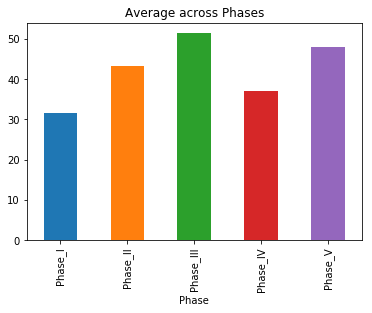

In [677]:
phase_df.Average.plot(kind = 'bar', title = 'Average across Phases')

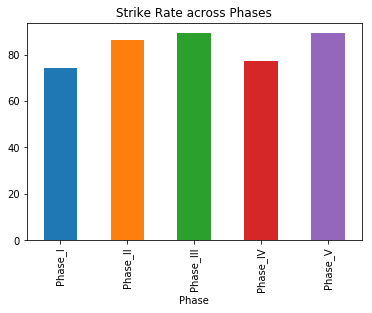

In [678]:
phase_df.SR.plot(kind = 'bar', title = 'Strike Rate across Phases')

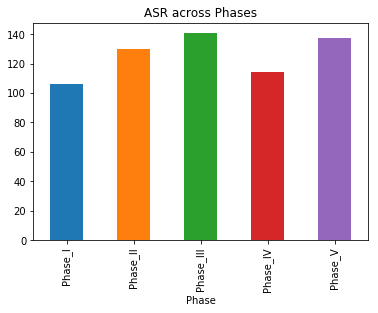

In [679]:
phase_df.ASR.plot(kind = 'bar', title = 'ASR across Phases')

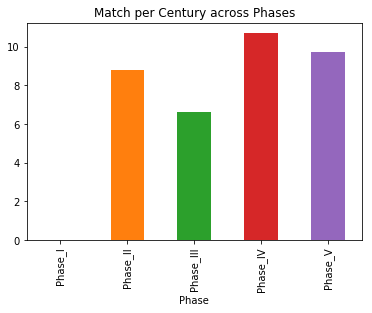

In [680]:
phase_df.Match_per_Century.plot(kind = 'bar', title = 'Match per Century across Phases')